### Import Libraries

In [ ]:
import pandas as pd

In [5]:
# get dataset
loans_df =  pd.read_csv('../../data/loans_day1.csv', index_col=0)

In [6]:
#show first 5 lines
loans_df.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,addr_state,dti,total_rec_late_fee,purpose,loan_status
0,76333286,15000.0,36 months,6.97,462.96,A,A3,5,MORTGAGE,60000.0,GA,21.84,0.000000,credit_card,Fully Paid
1,31217609,8000.0,36 months,16.29,282.41,D,D2,10,OWN,43000.0,FL,24.81,0.000000,other,Fully Paid
2,1278205,3500.0,60 months,20.50,93.71,E,E2,5,OWN,34000.0,OH,21.07,14.968877,debt_consolidation,Charged Off
3,130928637,3700.0,36 months,23.87,144.91,E,E2,1,RENT,36000.0,WA,16.73,0.000000,vacation,Current
4,71845894,24000.0,36 months,14.46,825.64,C,C4,10,MORTGAGE,106404.0,CA,13.54,0.000000,home_improvement,Fully Paid


### Preprocessing

Before we dive into the modelling we'll need to talk a bit about preprocessing first!

You might not expect it but data-preprocessing is one the most import aspects of Data Science and therefore also one of the most time-consuming.

![img](https://docs.google.com/uc?export=download&id=1JQuyBRxSWh90xIuxGU12cIAVyMOoI4aO)

Let's look at this chart which visualises the spreak of workload for a common data scientist.

We can clearly see the actual modelling only takes up a small amount of time on a daily basis and that the steps before take up a lot more time.

We already talked about data-sourcing or collecting data-sets in the last lecture. So let's focus on the data cleaning and preprocessing now.

**Data cleaning** is relatively straightforward. Here we make sure our dataset does not include `missing values` and/or `duplicates`. Duplicates we will off course remove. We can do the same for missing values but there's [other ways](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to handle these (which we will not discuss here).

Another part of our cleaning is to potentially remove noisy data such as `outliers`. This will again not be discussed here but you can find more information [here](https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8)

After we've cleaned our data we move on to **data preprocessing**. Here we will transform the data to a context where a machine can work with them. An example you will see a bit later is `scaling`where we use statistical methods to put all our variables on the same scale and hence generally improving the performance of our models. Another will be handling categorical or text-data.

#### Data cleaning

##### 1. Duplicates

In any preprocessing workflow you would tackle `duplicates` first. You can check `.duplicated().sum()`to see how many duplicate rows you have. Next you can remove them with `.drop_duplicates()`. Let's check the cell below. If it's 0 we've taken care of it for you.. if not good luck!

In [ ]:
loans_df.duplicated().sum()

0

##### 2. Null values/Missing data

After the duplicats you would normally handle missing data or `null-values`. Again we've already taken care of this for you. Check out below coding cell to see the % of `null-values` per column as proof!

In [ ]:
loans_df.isnull().sum()/len(loans_df)

loan_amnt             0.0
term                  0.0
int_rate              0.0
installment           0.0
grade                 0.0
emp_length            0.0
home_ownership        0.0
annual_inc            0.0
dti                   0.0
total_rec_late_fee    0.0
loan_status           0.0
dtype: float64

#### Data preprocessing

#### 1. Encoding

You might have already noticed that we have some columns containing text. ML models off course can't handle text but no worries! We'll handle these quickly by using encoding.

#### Ordinal encoding

![img](https://docs.google.com/uc?export=download&id=12BTL1wqY9qvolONkwDQCL7AqzFZcsi2H)

These are `ordinal variables` where we can assign an assign an inherent importance to each variable. Hence for these variables **order matters**.
This means that it makes sense for us in this context to assign higher numbers to categories of higher importance. That way our ML algorithm can pick up on this hierachy.

Examples of this in real life would be level of education, customer satisfaction or in our example `grade`.

`grade` has 7 unique values, all representing a specific grade that is related to the client's solvency.

In [ ]:
loans_df.grade.nunique()

7

In [ ]:
loans_df.grade.value_counts()

B    36801
C    35619
A    22597
D    18848
E     8802
F     3158
G      854
Name: grade, dtype: int64

Makes sense that there is a structure here and that someone with grade A would have more change of paying back their loan compared to someone with an F grade.

Let's use the sklearns `OrdinalEncoder` class to add this hierarchy in our dataset

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#specify list of lists in order
cat = [['G', 'F', 'E', 'D', 'C', 'B', 'A']]

#instantiate encoder
ord_enc = OrdinalEncoder(categories=cat)

#fit encoder on grade
ord_enc.fit(loans_df[['grade']])

#transform grade variable
loans_df['grade'] = ord_enc.transform(loans_df[['grade']])

loans_df.grade.value_counts()

5.0    36801
4.0    35619
6.0    22597
3.0    18848
2.0     8802
1.0     3158
0.0      854
Name: grade, dtype: int64

#### Feature encoding

![img](https://docs.google.com/uc?export=download&id=1Z_kta3r_2IeUeF80W_qkIr8maFbaJa6N)

These are `nominal variables` where there's not really an inherent hierarchy as all possibilites are of equal importance. Hence for these variables **order does not matter**
Here we have to apply a different technique as above because we want our ML algorithm to pick up on the fact that all these variables are of equal importance. This technique, that will create a binary column for each individual option, is referred to as `on-hot-encoding`.
Examples of this in real life would be state, gender or in our example (althoug slightly debatable) `home ownership`.

`home_ownership` has 6 unique values.

In [ ]:
loans_df.home_ownership.value_counts()

MORTGAGE    63289
RENT        50572
OWN         12767
ANY            31
OTHER          18
NONE            2
Name: home_ownership, dtype: int64

Of our 6 values we're only really interested in the top 3. Use `.isin()`to filter the DF on multiple conditions

In [ ]:
loans_df = loans_df[loans_df['home_ownership'].isin(['MORTGAGE','RENT', 'OWN'])]

In [ ]:
loans_df.home_ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT'], dtype=object)

Let's use the `one_hot_encoder` to transfer these values to all seperate binary columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Instantiate encoder
ohe = OneHotEncoder(sparse = False)

# Fit encoder
ohe.fit(loans_df[['home_ownership']]) 

# Encode ownership
home_encoded = ohe.transform(loans_df[['home_ownership']]) 

# Transpose encoded ownership back into dataframe -> be sure to check .unique() to figure out the order of the columns
loans_df["mortgage"],loans_df["own"],loans_df['rent'] = home_encoded.T 

#drop original columns
loans_df.drop(columns='home_ownership', inplace=True)

loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,total_rec_late_fee,loan_status,mortgage,own,rent
0,15000.0,36 months,6.97,462.96,6.0,5,60000.0,21.84,0.000000,Fully Paid,1.0,0.0,0.0
1,8000.0,36 months,16.29,282.41,3.0,10,43000.0,24.81,0.000000,Fully Paid,0.0,1.0,0.0
2,3500.0,60 months,20.50,93.71,2.0,5,34000.0,21.07,14.968877,Charged Off,0.0,1.0,0.0
4,24000.0,36 months,14.46,825.64,4.0,10,106404.0,13.54,0.000000,Fully Paid,1.0,0.0,0.0
5,7200.0,36 months,7.90,225.29,6.0,3,68000.0,7.98,14.979058,Charged Off,0.0,0.0,1.0


Now that we've gotten used to the `one_hot_encoder` let's take a look at the column **term** as well. Here we have two options so we can transform it to one binary columns with one value being 1 and the other being 0.

We can use the parameter `drop = 'if_binary'` to get our desired result.

In [ ]:
loans_df.term.value_counts()

 36 months    95336
 60 months    31292
Name: term, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Instantiate encoder with extra param
ohe = OneHotEncoder(sparse = False, drop='if_binary')

# Fit encoder
ohe.fit(loans_df[['term']]) 

# Encode alley
home_encoded = ohe.transform(loans_df[['term']]) 

# Transpose encoded term back into dataframe by overwriting the original column
loans_df["term"] = home_encoded


loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,total_rec_late_fee,loan_status,mortgage,own,rent
0,15000.0,0.0,6.97,462.96,6.0,5,60000.0,21.84,0.000000,Fully Paid,1.0,0.0,0.0
1,8000.0,0.0,16.29,282.41,3.0,10,43000.0,24.81,0.000000,Fully Paid,0.0,1.0,0.0
2,3500.0,1.0,20.50,93.71,2.0,5,34000.0,21.07,14.968877,Charged Off,0.0,1.0,0.0
4,24000.0,0.0,14.46,825.64,4.0,10,106404.0,13.54,0.000000,Fully Paid,1.0,0.0,0.0
5,7200.0,0.0,7.90,225.29,6.0,3,68000.0,7.98,14.979058,Charged Off,0.0,0.0,1.0


**loan_status** will be our target for our classification task. We can transform this one using the `one_hot_encoder` as before or we can also use the `label_encoder` which is specifically designed for this purpose.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

label.fit(loans_df['loan_status'])

loans_df['loan_status'] = label.transform(loans_df['loan_status'])

loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,dti,total_rec_late_fee,loan_status,mortgage,own,rent
0,15000.0,0.0,6.97,462.96,6.0,5,60000.0,21.84,0.000000,1,1.0,0.0,0.0
1,8000.0,0.0,16.29,282.41,3.0,10,43000.0,24.81,0.000000,1,0.0,1.0,0.0
2,3500.0,1.0,20.50,93.71,2.0,5,34000.0,21.07,14.968877,0,0.0,1.0,0.0
4,24000.0,0.0,14.46,825.64,4.0,10,106404.0,13.54,0.000000,1,1.0,0.0,0.0
5,7200.0,0.0,7.90,225.29,6.0,3,68000.0,7.98,14.979058,0,0.0,0.0,1.0


In [ ]:
loans_df['loan_status'].value_counts()

1    101896
0     24732
Name: loan_status, dtype: int64

Let's save our preprocessed dataset before we move on to scaling

In [ ]:
loans_df.to_csv('../data/data_preprocessed.csv')

#### 2. Feature scaling

![img](https://docs.google.com/uc?export=download&id=1AfP4BzVxlQ2Kr16YZgPwUuHCCJBOSSU0)

Scaling is also very important in our preprocessing. Putting variables on the same scale will allow our model to treat every column equally and not give more importance to relatively larger values (like `annual_inc` vs `emp_length` for example).
Always scale when doing any type or application of ML. It'll greatly improve your model!
There are quite some scalers out there but let's use the **standard_scaler** to keep it simple. Here we use the mean and standard deviation of every feature to scale these features so that it has a mean value of 0 and a standard deviation of 1.

Let's check first the distribution of `int_rate` and `installment`

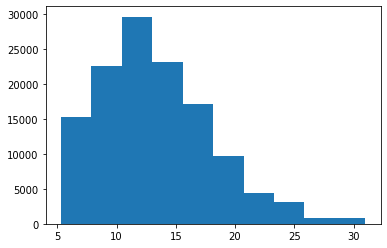

In [ ]:
import matplotlib.pyplot as plt

plt.hist(loans_df['int_rate']);

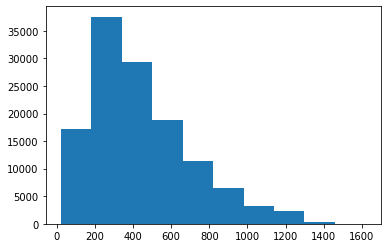

In [ ]:
plt.hist(loans_df['installment']);

You can clearly see that these variables have a similar distribution but are on a different scale. 

Scaling these variables will have multiple effects for our model:
- it will make sure that `installment` does not outweigh `int_rate` just purely based on it's scale
- the smaller values will make our model computationally more efficient
- it will increase the interpretability of feature coefficients

In [ ]:
#define x & y because we don't wanna scale our target
from sklearn.model_selection import train_test_split

X = loans_df.drop(columns='loan_amnt')

y = loans_df.loan_amnt

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Instanciate StandarScaler
scaler = StandardScaler() 

# Fit scaler to data
scaler.fit(X_train)

# Use scaler to transform data
X_train_scaled = scaler.transform(X_train) 

# create df to show output
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = scaler.get_feature_names_out())

X_train_scaled_df.head()

,term,int_rate,installment,grade,emp_length,annual_inc,dti,total_rec_late_fee,loan_status,mortgage,own,rent
0,-0.573047,-0.815965,-1.400487,1.339585,0.268289,-0.307164,-1.409721,-0.1407,0.491687,-0.997330,-0.335171,1.22387
1,1.745058,2.769579,2.343173,-2.501301,-1.416086,0.149647,0.656564,-0.1407,0.491687,-0.997330,-0.335171,1.22387
2,1.745058,0.159253,-0.415155,-0.196770,-0.012440,-0.439993,0.831121,-0.1407,-2.033816,1.002677,-0.335171,-0.81708
3,1.745058,1.293179,0.303732,-0.964947,1.110476,0.419283,1.894232,-0.1407,0.491687,1.002677,-0.335171,-0.81708
4,-0.573047,-0.258399,0.840628,0.571408,-0.293170,0.550175,-1.392896,-0.1407,0.491687,1.002677,-0.335171,-0.81708


Now let's check `int_rate` and `installment` again. You see that while the distribution remained the same, the scale changed right?

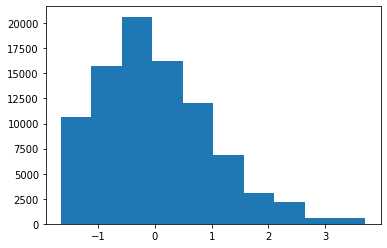

In [ ]:
plt.hist(X_train_scaled_df['int_rate']);

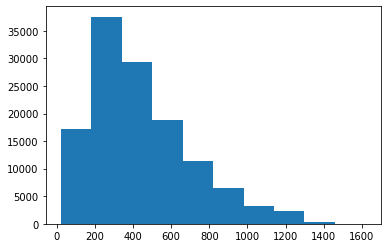

In [ ]:
plt.hist(loans_df['installment']);

### Check performance

Now let's check the difference in performance. For this we'll use a new model!

K-Nearest Neighbors (KNN) is a non-linear, distance based model capable of solving both regression and classification tasks.

*   Looks at K closest samples to make a prediction
*   Up to us to determine K (hyperparameter)



![img](https://docs.google.com/uc?export=download&id=1zPhJFC1Y4rUcHIRbhyAWRs3I8924Pp-_)

![img](https://docs.google.com/uc?export=download&id=1tJgdoNwaZ8IzhyUNUQtyUSry5L3SvUFr)

![img](https://docs.google.com/uc?export=download&id=1XdHcWnahZQKEaa9w7SUGVvYPG3wjUGkd)

![img](https://docs.google.com/uc?export=download&id=1MOWK38ksmco27lv95UEEV8Ynk23WUIKC)

![img](https://docs.google.com/uc?export=download&id=1-fkfQ4OHTX2fjfdWxZz_Z7i6V9fjp13b)

![img](https://docs.google.com/uc?export=download&id=1wEKxO0BZ_-ZQpb2V7qfUsFCg_AiFCUyd)

Let's first run a regression with our unscaled variables:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.903639095260315

Now let's run one with our scaled variables to see the difference in performance

In [ ]:
knn.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

knn.score(X_test_scaled, y_test)

0.9795729155934739